<a href="https://colab.research.google.com/github/chamoflag/AI-ML/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
!pip install --upgrade quandl

In [117]:
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import style as st
import quandl as q
import pickle
#import Quandl as q
st.use('ggplot')

In [118]:
data = q.get('WIKI/GOOGL',authtoken='3sH4LXxJ5t5v4YDmmePw')
data.to_csv('googl.csv')
df = pd.read_csv('googl.csv', index_col='Date', parse_dates=True)

In [119]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,1092.57,1108.70,1087.21,1094.000,1990515.0,0.0,1.0,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.150,3418154.0,0.0,1.0,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.550,2413517.0,0.0,1.0,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


In [120]:
df=df[["Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]]

In [121]:
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...
2018-03-21,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


In [122]:
df["HCL_PCT"]=(df["Adj. Open"]-df["Adj. Close"])/df["Adj. Close"]*100.0

<ipython-input-122-e47156166a2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HCL_PCT"]=(df["Adj. Open"]-df["Adj. Close"])/df["Adj. Close"]*100.0


In [123]:
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HCL_PCT
Date,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,-0.323915
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,-6.739913
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,1.243144
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.074187
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,-1.169811
...,...,...,...,...,...,...
2018-03-21,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0,-0.130713
2018-03-22,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0,2.550444
2018-03-23,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0,2.417807


In [124]:
df["PCT_change"]=(df["Adj. Close"]-df["Adj. Open"])/df["Adj. Open"]*100.0

<ipython-input-124-96b4563cbd52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PCT_change"]=(df["Adj. Close"]-df["Adj. Open"])/df["Adj. Open"]*100.0


In [125]:
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HCL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,-0.323915,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,-6.739913,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,1.243144,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.074187,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,-1.169811,1.183658
...,...,...,...,...,...,...,...
2018-03-21,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0,-0.130713,0.130884
2018-03-22,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0,2.550444,-2.487014
2018-03-23,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0,2.417807,-2.360729


In [126]:
df=df[["Adj. Close","HCL_PCT","PCT_change","Adj. Volume"]]

In [127]:
df

,Adj. Close,HCL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,-0.323915,0.324968,44659000.0
2004-08-20,54.322689,-6.739913,7.227007,22834300.0
2004-08-23,54.869377,1.243144,-1.227880,18256100.0
2004-08-24,52.597363,6.074187,-5.726357,15247300.0
2004-08-25,53.164113,-1.169811,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,-0.130713,0.130884,1990515.0
2018-03-22,1053.150000,2.550444,-2.487014,3418154.0
2018-03-23,1026.550000,2.417807,-2.360729,2413517.0


In [128]:
forecast_col="Adj. Close"

In [129]:
df.fillna(-99999,inplace=True)

<ipython-input-129-a59c449b0086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(-99999,inplace=True)


In [130]:
forecast_out=int(math.ceil(0.01*len(df)))
df["label"]=df[forecast_col].shift(-forecast_out)

<ipython-input-130-e659048c362a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"]=df[forecast_col].shift(-forecast_out)


In [131]:
X=np.array(df.drop(["label"],1))
X=preprocessing.scale(X)
X=X[:-forecast_out]
X_lately=X[-forecast_out:]
df.dropna(inplace=True)
Y=np.array(df["label"])
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
#clf=LinearRegression(n_jobs=-1)
#clf.fit(X_train,Y_train)
#with open("linearregression.pickle","wb") as f:
#  pickle.dump(clf,f)
pickle_in=open("linearregression.pickle","rb")
clf=pickle.load(pickle_in)
accuracy=clf.score(X_test,Y_test)
print(accuracy)

0.9728619109456798


<ipython-input-131-ab291d072fc9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(["label"],1))
<ipython-input-131-ab291d072fc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [132]:
forecast_set=clf.predict(X_lately)
print(forecast_set,accuracy,forecast_out)

[1052.78575131 1066.45543615 1079.85945982 1074.79483216 1068.58754989
 1066.03387695 1064.21607891 1061.23367247 1055.60681863 1051.44626113
 1048.91791731 1067.74531251 1085.87649604 1090.50799417 1104.66029441
 1108.67488854 1107.20216988 1104.71655091 1106.41586478 1124.11069087
 1124.59445238 1133.07211537 1130.00519078 1137.34819747 1157.24382563
 1169.31731302 1164.39493612 1175.36524557 1180.49692922 1179.58762642
 1170.54652906 1175.36306543 1174.32228215 1111.94458989 1062.01181195] 0.9728619109456798 35


<ipython-input-133-aae0a6a9eb2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Forecast"]=np.nan
<ipython-input-133-aae0a6a9eb2d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date]=[np.nan for _ in range (len(df.columns)-1)] + [i]
<ipython-input-133-aae0a6a9eb2d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date]=[np.nan for _ in range (len(

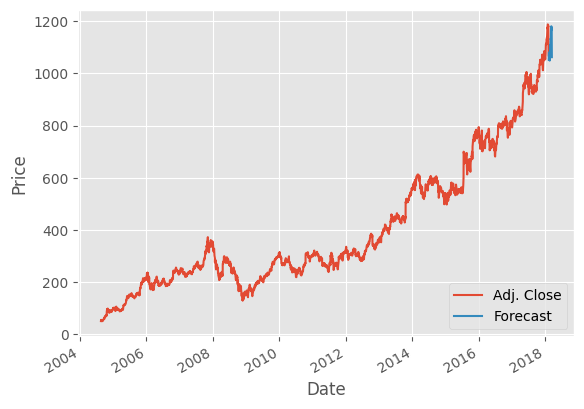

In [133]:
df["Forecast"]=np.nan
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day
for i in forecast_set:
  next_date=dt.datetime.fromtimestamp(next_unix)
  next_unix+=one_day
  df.loc[next_date]=[np.nan for _ in range (len(df.columns)-1)] + [i]
df["Adj. Close"].plot()
df["Forecast"].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()